# Importance Sampling

mathematicalmonk
[1](https://www.youtube.com/watch?v=S3LAOZxGcnk&list=PLD0F06AA0D2E8FFBA&index=131)
[2](https://www.youtube.com/watch?v=3Mw6ivkDVZc&list=PLD0F06AA0D2E8FFBA&index=132)
[3](https://www.youtube.com/watch?v=gYvlnu5AAzE&list=PLD0F06AA0D2E8FFBA&index=133)

##### MC
\begin{eqnarray}
\mathbb{E}_{X\sim p}f(X)
&\approx&\frac{1}{n}\sum_{i=1}^n f(X_i)&&&&\mbox{$X_i\sim p$ iid}
\end{eqnarray}

##### Importance Sampling
\begin{eqnarray}
\mathbb{E}_{X\sim p}f(X)
&=&\int f(x)p(x)dx\\
&=&\int \frac{p(x)}{q(x)}f(x)q(x)dx\\
&=&\mathbb{E}_{X\sim q} \frac{p(X)}{q(X)}f(X)\\
&:=&\mathbb{E}_{X\sim q} \omega(X) f(X)&&&&\omega(X)=\frac{p(X)}{q(X)}\\
&\approx&\frac{1}{n}\sum_{i=1}^n\omega(X_i)f(X_i)&&&&\mbox{$X_i\sim q$ iid}
\end{eqnarray}

#### Example

\begin{array}{llllllllllll}
\mbox{MC}&&&&\mathbb{E}_{X\sim N(0,1)}f(X)
&\approx&\frac{1}{n}\sum_{i=1}^nf(X_i)&&&&\mbox{$X_i\sim N(0,1)$ iid}\\
\mbox{IS}&&&&\mathbb{E}_{X\sim N(0,1)}f(X)&\approx&\frac{1}{n}\sum_{i=1}^n\omega(X_i)f(X_i)&&&&\mbox{$X_i\sim N(-3,1)$ iid}
\end{array}
where
$$
f(x)=(-x-3)^+=\left\{\begin{array}{ll}
-x-3&\mbox{if $-x-3\ge 0$}\\
0&\mbox{otherwise}
\end{array}
\right.
$$

In [1]:
%matplotlib inline

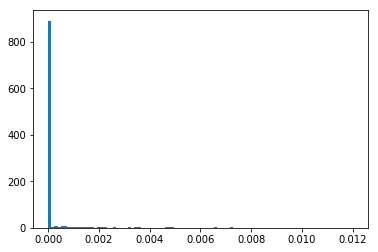

In [2]:
# MC

import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.maximum(-x-3, 0)

n = 100
n_sim = 1000
x = np.random.normal(0., 1., (n_sim, n))
nfx = np.mean(f(x), axis=1)

bins = np.linspace(0.,0.012,100)
plt.hist(nfx, bins=bins)
plt.show()

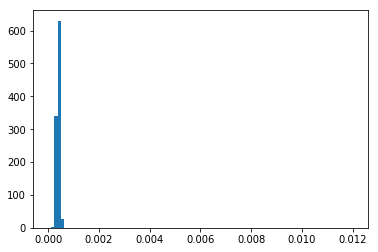

In [3]:
# Importance Sampling

import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.maximum(-x-3, 0)

def omega(x):
    return np.exp(- x**2/2 + (x+3)**2/2)

n = 100
n_sim = 1000
x = np.random.normal(-3., 1., (n_sim, n))
nfx = np.mean(omega(x)*f(x), axis=1)

bins = np.linspace(0.,0.012,100)
plt.hist(nfx, bins=bins)
plt.show()

##### Importance Sampling without Normalization

- We can generate $n$ iid samples $X_i$ not from original PDF $p(x)$,
but from a new PDF $q(x)$.

- We know $\tilde{p}$, not $p=\tilde{p}/Z_p$. We don't know normalization constant $Z_f$. 

- We know $\tilde{q}$, not $q=\tilde{q}/Z_q$. We don't know normalization constant $Z_q$. 


With
$
\tilde{\omega}(X)=\frac{\tilde{p}(X)}{\tilde{q}(X)}
$
\begin{eqnarray}
\mathbb{E}_{X\sim p}f(X)
&\approx&\frac{1}{n}\sum_{i=1}^n\frac{\tilde{\omega}(X_i)}{\sum_{k=1}^n \tilde{\omega}(X_k)}f(X_i)&&&&\mbox{$X_i\sim q$ iid}
\end{eqnarray}

Estimate $\mathbb{E}_{X\sim p}f(X)$ by
\begin{eqnarray}
\mathbb{E}_{X\sim p}f(X)
&=&\int f(x)p(x)dx\\
&=&\int \frac{p(x)}{q(x)}f(x)q(x)dx\\
&=&\frac{Z_q}{Z_p}\int \frac{\tilde{p}(x)}{\tilde{q}(x)}f(x)q(x)dx \\
&=&\frac{Z_q}{Z_p}\mathbb{E}_{X\sim q} \frac{\tilde{p}(X)}{\tilde{q}(X)}f(X) \\
&:=&\frac{Z_q}{Z_p}\mathbb{E}_{X\sim q} \tilde{\omega}(X)f(X)&&&&\tilde{\omega}(X)=\frac{\tilde{p}(X)}{\tilde{q}(X)} \\
&\approx&\frac{Z_q}{Z_p}\left(\frac{1}{n}\sum_{i=1}^n\tilde{\omega}(X_i)f(X_i)\right)&&&&\mbox{$X_i\sim q$ iid}\\
&=&\frac{1}{n}\sum_{i=1}^n\frac{\tilde{\omega}(X_i)}{\frac{Z_p}{Z_q}}f(X_i)
\end{eqnarray}

Estimate $Z_p/Z_q$ by
\begin{eqnarray}
\frac{Z_p}{Z_q}
&=&\frac{1}{Z_q}\int \tilde{p}(x)dx\\
&=&\int \tilde{p}(x)\frac{1}{Z_q}dx\\
&=&\int \tilde{p}(x)\frac{q(x)}{\tilde{q}(x)}dx\\
&=&\int \frac{\tilde{p}(x)}{\tilde{q}(x)}q(x)dx\\
&=&\int {\tilde\omega}(x)q(x)dx\\
&=&\mathbb{E}_{X\sim q}{\tilde\omega}(X)\\
&\approx&\frac{1}{n}\sum_{i=1}^n\tilde{\omega}(X_i)&&&&\mbox{$X_i\sim q$ iid}
\end{eqnarray}

# Pros and cons of importance sampling

##### Pros

- Easier to sample from $q$

- Can reduce the variance of the estimator

- Works well in low dimension up to 6

##### Cons

- Does not work well in high dimension ($\Rightarrow$ MCMC)

- Need modification in sequential setting ($\Rightarrow$ sequential importance sampling)

# How to choose $q$
$$
\mbox{argmin}_q\  \int\frac{p^2f^2}{q^2}q-\left(\int\frac{pf}{q}q\right)^2
=\mbox{argmin}_q\  \int\frac{p^2f^2}{q^2}q-\left(\int pf\right)^2
=\mbox{argmin}_q\  \int\frac{p^2f^2}{q^2}q
$$

$$
\mbox{argmin}_{q_i>0,\ \sum_i q_i=1}\ \ \sum_i\frac{p_i^2f_i^2}{q_i^2}q_i
$$
$$
{\cal L}=\sum_i\frac{p_i^2f_i^2}{q_i^2}q_i-\beta\left(\sum_i q_i-1\right)
=\sum_i\frac{p_i^2f_i^2}{q_i}-\beta\left(\sum_i q_i-1\right)
$$
$$
\frac{\partial{\cal L}}{\partial q_i}=-\frac{p_i^2f_i^2}{q_i^2}-\beta=0
\ \ \Rightarrow\ \ q_i^2\propto p_i^2f_i^2
\ \ \Rightarrow\ \ q_i\propto p_if_i
\ \ \Rightarrow\ \ q_i=\frac{p_if_i}{\sum_k p_kf_k}
$$

$$\begin{array}{llllll}
\mbox{1st choice}&&q\propto pf\ \ \Rightarrow\ \  q=\frac{pf}{Z}\nonumber\\
\nonumber\\
\mbox{2nd choice}&&\mbox{Choose $q$ large when $pf$ is large}\nonumber\\
\nonumber\\
\mbox{Other choice}&&\mbox{Minimize the variance of the posterior}\nonumber\\
\nonumber\\
\mbox{Other choice}&&\mbox{Minimize the variance of the MCMC}\nonumber\\
\nonumber\\
\mbox{Other choice}&&\mbox{Use MLE or MAP}\nonumber\\
\nonumber\\
\mbox{Other choice}&&\mbox{Study the nature of the problem}\nonumber\\
\nonumber\\
\mbox{Other choice}&&\mbox{Cross validation}\nonumber\\
\end{array}$$